In [4]:
import pandas as pd

data = pd.read_csv('datasets/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6, random_state=55, criterion='log_loss') # criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Accuracy:  79.16666666666666 %

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       130
           1       0.72      0.58      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192


Confusion Matrix:
 [[116  14]
 [ 26  36]]


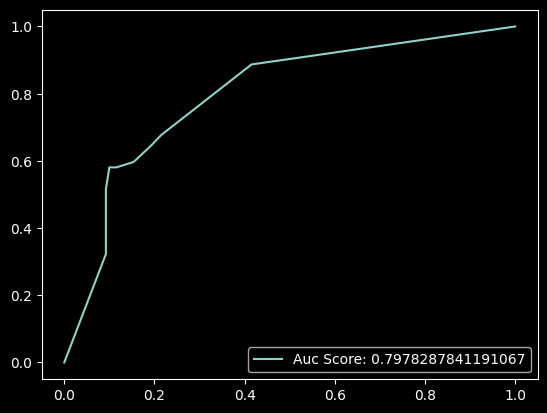

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_mtrx = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy*100, "%")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_mtrx)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.style.use('dark_background')
plt.plot(fpr, tpr, label=f"Auc Score: {auc}")
plt.legend(loc=4)
plt.show()

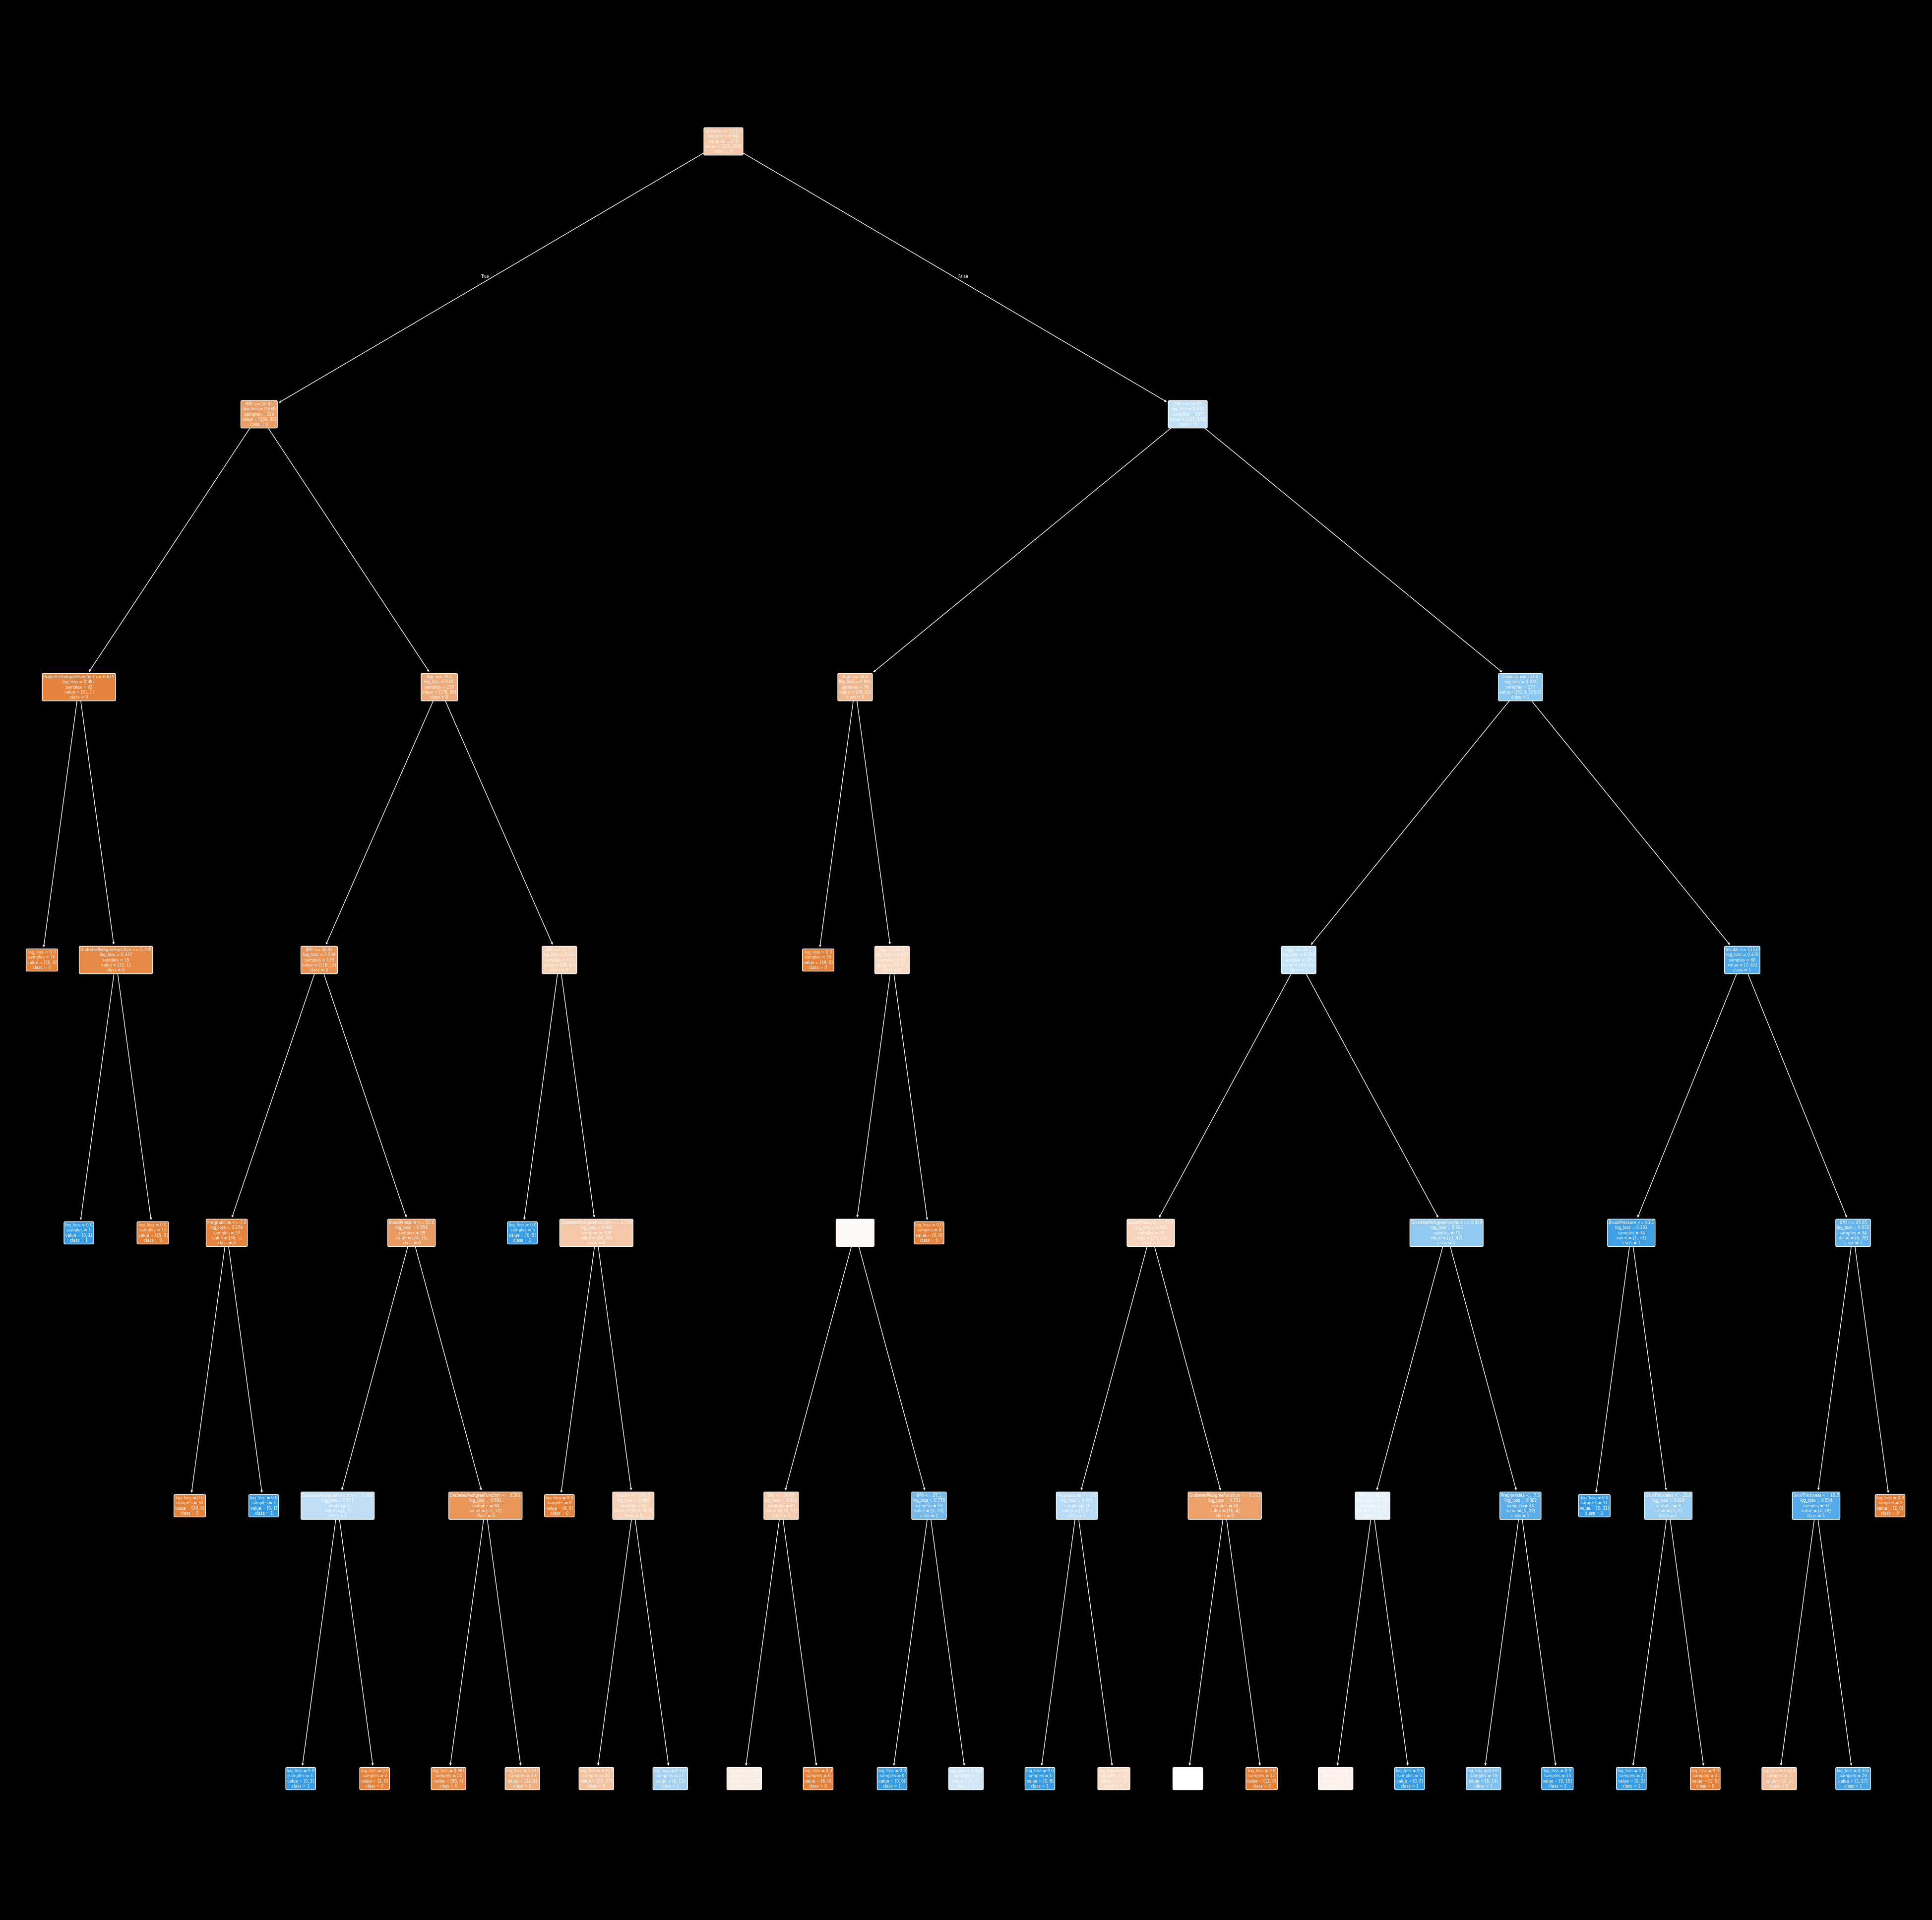

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(model, filled=True, rounded=True,feature_names=data.columns.tolist()[:-1], class_names = ['0', '1'])
plt.show()

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(model, filled=True, rounded=True,feature_names=data.columns.tolist()[:-1], class_names = ['0', '1'], out_file='diabetes_tree.dot')